# Creating a preprocessing function

In [40]:
#We started with reshaping the token_pro function from lecture 11 to
def preprocessing(corpus):
    """ (same as above, but: ) takes a list of strings (corpus of documents), 
    do preprocessing on each one, return list of preprocessed corpus
    """
    
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    corpusTokens = [word_tokenize(item) for item in corpus]
    corpusTokens = [ [word.lower().strip() for word in item if word.isalnum() and word not in stopwords] 
               for item in corpusTokens]
    
    return corpusTokens

# Importing data

In [41]:
import pandas as pd
#this is the file uploaded on canvas under exercise 11
newsItems = pd.read_csv('../../../../Data Management/AC track data/2021-10-18 News items on space.csv')
newsItems.head()

,string,date,url,author,source
0,William Shatner becomes the oldest person to r...,2021-10-13T14:54:44Z,https://www.engadget.com/william-shatner-blue-...,Jon Fingas,"{'id': 'engadget', 'name': 'Engadget'}"
1,Jett: The Far Shore Imagines Conscientious Spa...,2021-10-13T12:00:00Z,https://www.wired.com/story/jett-the-far-shore...,Lewis Gordon,"{'id': 'wired', 'name': 'Wired'}"
2,11 Scary Space Facts That'll Make You Apprecia...,2021-10-08T12:00:00Z,https://lifehacker.com/11-scary-space-facts-th...,Stephen Johnson,"{'id': None, 'name': 'Lifehacker.com'}"
3,UK takes on Elon Musk in the broadband space r...,2021-10-10T14:01:00Z,https://techncruncher.blogspot.com/2021/10/uk-...,noreply@blogger.com (Unknown),"{'id': None, 'name': 'Blogspot.com'}"
4,Blue Origin postpones William Shatner’s space ...,2021-10-10T19:12:00Z,https://techncruncher.blogspot.com/2021/10/blu...,noreply@blogger.com (Unknown),"{'id': None, 'name': 'Blogspot.com'}"


In [6]:
#using the function to preprocess strings and create lists of words for each document
corpusTokens = preprocessing(newsItems['string'])

In [9]:
#Obtain the average document length (after preprocessing has removed stopwords)
length_docs = [len(document) for document in corpusTokens]
averageWordCount = sum(length_docs)/len(newsItems.string)
averageWordCount

51.15

# Creating visualization of most frequent words

In [13]:
from collections import Counter
from datetime import datetime

In [21]:
begin_time = datetime.now()


iteration = 0
divide = 1 #variable to vary the fraction of the dataset that is computed, i.e. when testing code

itermax = len(corpusTokens)//divide #the maximum number of iterations, function of 'divide'

count_all = Counter(corpusTokens[0]) #creating a counter, counting for first document

for i in range(1, itermax):
    count_all.update(Counter(corpusTokens[i])) #updating counter object with counts from all other docs.
    iteration+=1

countAllWords = count_all #storing the total counts in a second container (counter object)


#creating a DataFrame of the counter's top 20 words, setting column names and index
count_all = pd.DataFrame(count_all.most_common(20)).rename(columns={0:'word',1:'count'}).set_index('word')


end_time = datetime.now()
print('time spent',end_time-begin_time)
count_all.head(5)

time spent 0:00:00.004256


,count
word,
space,62
shatner,21
william,19
chars,19
blue,17


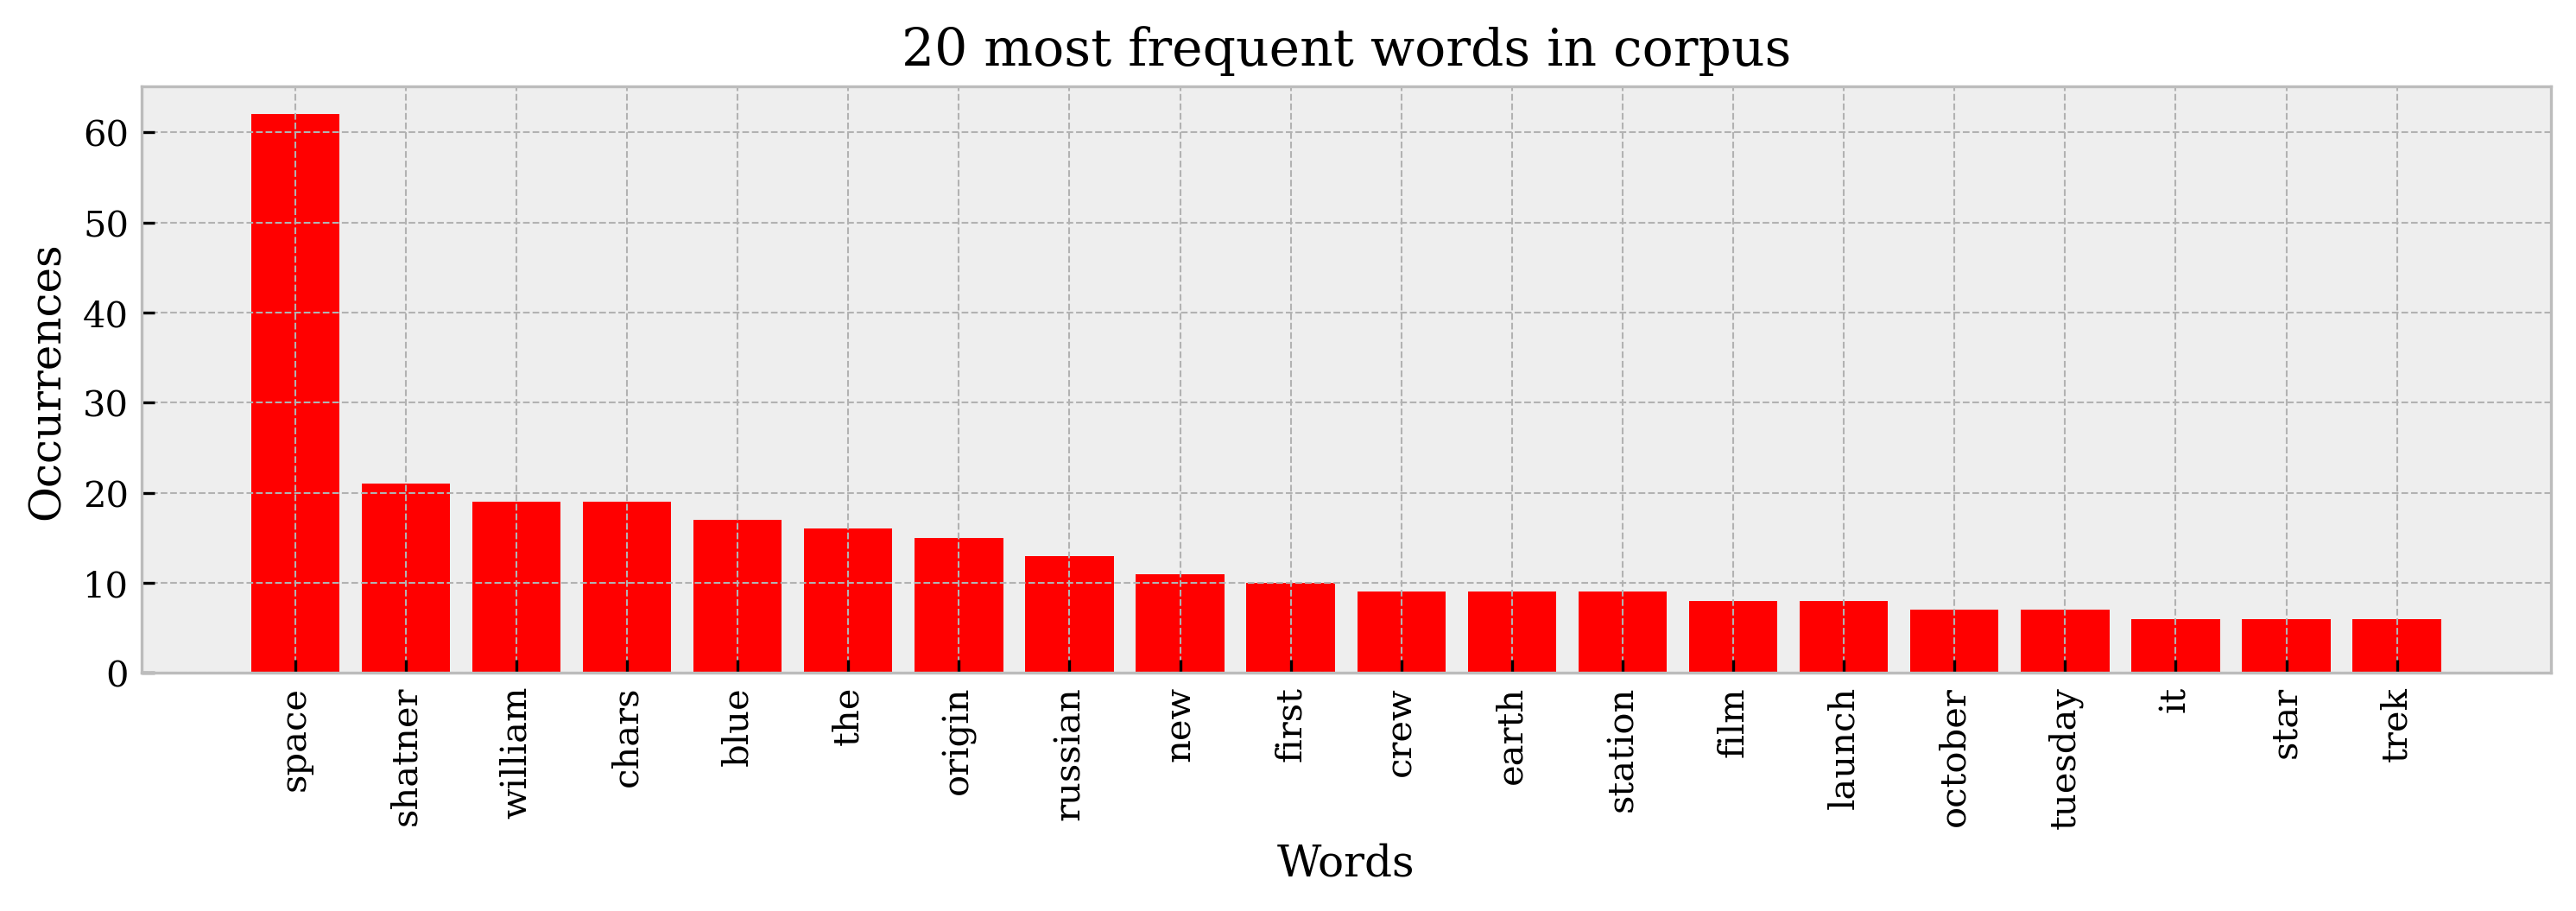

In [44]:
#barchart of the 20 most frequent words from the corpus, from above DataFrame
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams["font.family"] = "serif"

fig, most_common_words = plt.subplots(figsize=(12,3),dpi=300)

most_common_words.bar(count_all.index,count_all['count'],color='r')
most_common_words.set_xticks(count_all.index)
most_common_words.set_xticklabels(count_all.index, rotation='vertical')
most_common_words.set_ylabel('Occurrences')
most_common_words.set_xlabel('Words')
most_common_words.set_title('20 most frequent words in corpus')
plt.savefig('most_common_20.png')
plt.show()

# Towards a bag of words vector representation

In [34]:
#We can extract our vocabulary from the keys of the Counter object holding all words
vocabulary = list(countAllWords.keys())
vocabulary.sort() #sorting them alphabetically (0-9,a-z)
len(vocabulary) #checking total number of words in corpus after preprocessing

472

## Suggested task to think about or implement before next session:
Create vector representations (Bag of Words, numeric vectors, whole numbers) for the documents based on the vocabulary. A sample vocabulary and three sample documents and resulting vectors are shown below. But try to implement on a more realistic dataset, such as the one offered in this session.

(We will cover an implementation of this in the next session)

The following cell further elaborates on the task with a very rudimentary examples of what processing we want to achieve, without the code to implement it.

## explanatory cell illustrating what the above task is about:

In [39]:
import numpy as np
import scipy.sparse
#example of the abovementioned task on a not realistic dataset:

#these are the docs:
docs = [['a', 'c', 'd'], ['a','b'], ['a','a','b','d']]
#an this is the vocabulary:
voca = ['a','b','c','d']


#the above "docs" have these vector representations in the form of BoW
vectors = [[1, 0, 1, 1], [1, 1, 0, 0], [2, 1, 0, 1]]

#the list of lists rep can take other forms, more suitable for calculations:
vectorsArray = np.array(vectors) #numpy array
vectorsSparse = scipy.sparse.csr_matrix(vectors) #sparse array - only values not zero are stored
print('list of lists\n',vectors)
print('\nnumpy array\n',vectorsArray)
print('\nsparse array\n',vectorsSparse)

list of lists
 [[1, 0, 1, 1], [1, 1, 0, 0], [2, 1, 0, 1]]

numpy array
 [[1 0 1 1]
 [1 1 0 0]
 [2 1 0 1]]

sparse array
   (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	2
  (2, 1)	1
  (2, 3)	1
